# Loading data

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:
import numpy as np
import pandas as pd
# Specify the path to your NPZ file
#file_path = '/content/drive/MyDrive/ML/project/mfccs.npy'
file_path = '/content/drive/MyDrive/ML_Project/mfccs.npy'

data = np.load(file_path, allow_pickle=True)


In [194]:
data.shape

(6042,)

In [195]:
mean_values_list=[]
for element in data:
    # Calculate the mean along the second axis (axis=1)
    mean_element = np.mean(element, axis=1)

    # Append the result to the new list
    mean_values_list.append(mean_element)

In [196]:
features=np.array(mean_values_list)
df=pd.read_csv("/content/drive/MyDrive/ML_Project/clean_dataset.csv")
y=df["gender"].values

In [197]:
df["gender"] = df["gender"].str.strip().str.lower().replace({'مرد': 'male'})

# Check unique values after fixing
unique_gender_values = pd.unique(df["gender"])
print(unique_gender_values)

['male' 'female']


In [198]:
import matplotlib.pyplot as plt


In [199]:
gender_counts = df["gender"].value_counts()
# Plotting the histogram
plt.bar(gender_counts.index, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

In [200]:
import numpy as np
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


# Count the class distribution before undersampling
class_distribution_before = Counter(y)
print("Class distribution before undersampling:", class_distribution_before)

# Calculate the desired number of samples for the majority class
minority_class = min(class_distribution_before, key=class_distribution_before.get)
majority_class = "male"
desired_majority_samples =  class_distribution_before[minority_class]

# Create the RandomUnderSampler with the desired sampling strategy
undersampler = RandomUnderSampler(sampling_strategy={majority_class: desired_majority_samples})

# Apply the undersampling to the dataset
X_resampled, y_resampled = undersampler.fit_resample(features, y)

# Count the class distribution after undersampling
class_distribution_after = Counter(y_resampled)
print("Class distribution after undersampling:", class_distribution_after)




Class distribution before undersampling: Counter({'male': 4720, 'female': 1322})
Class distribution after undersampling: Counter({'female': 1322, 'male': 1322})


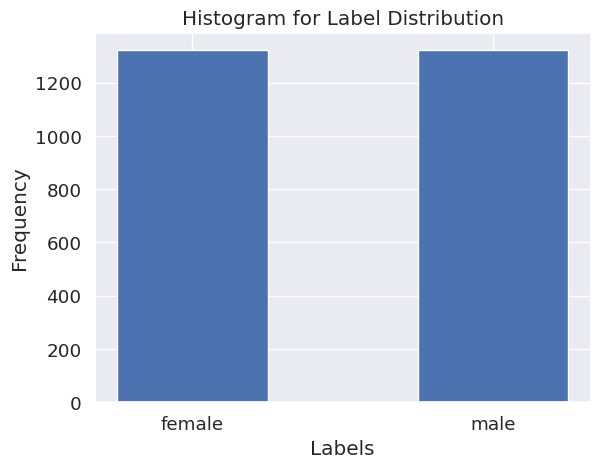

In [201]:
 #Create a histogram for the 'labels' list
plt.hist(y_resampled, bins=[0, 1, 2], align='left', rwidth=0.5)

# Customize the plot (optional)
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram for Label Distribution')

# Show the histogram
plt.show()

In [202]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)



# Keeping the original dimenstions

## Normalized

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)


### liners SVM

In [204]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [205]:

y_pred = model.predict(X_test)

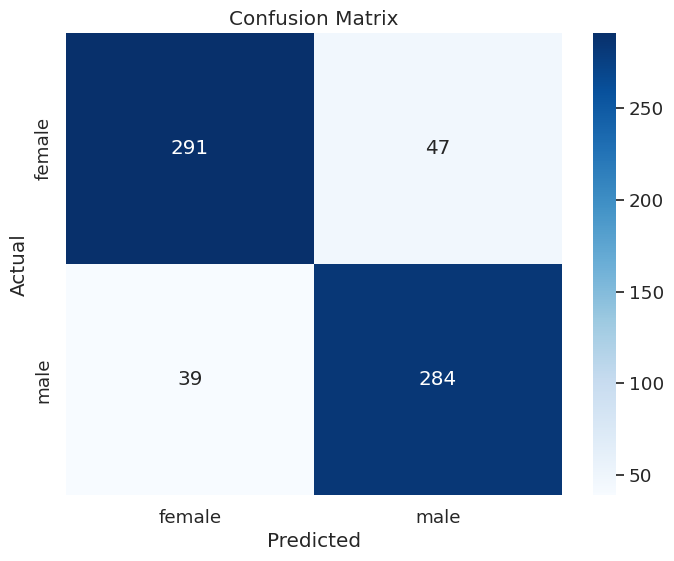

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [207]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.86      0.88      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



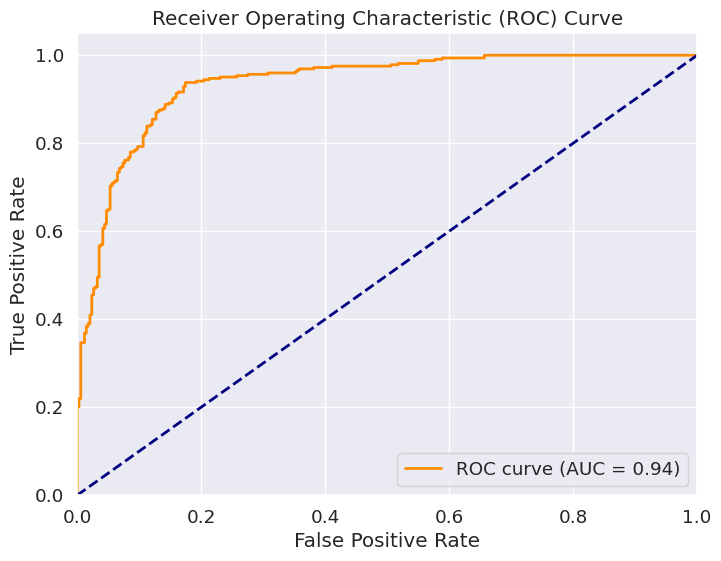

In [208]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [209]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8580060422960725
Recall: 0.8792569659442725
F1 score: 0.8685015290519877


### Naive Bayes

In [210]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [211]:

y_pred = model.predict(X_test)

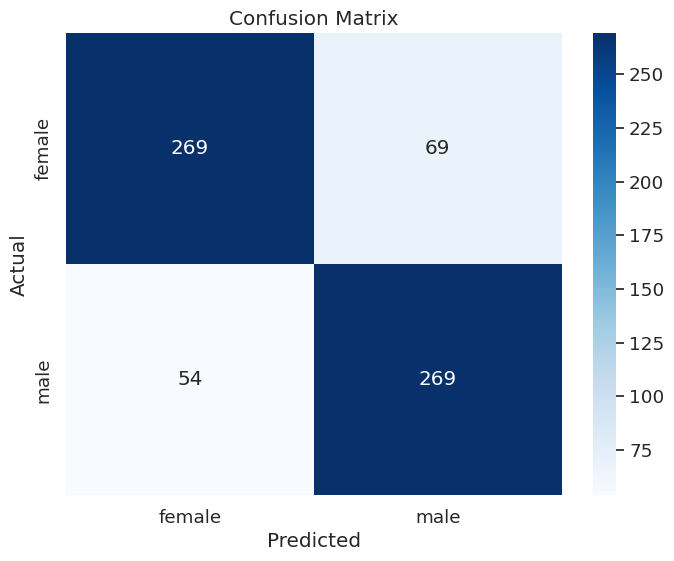

In [212]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [213]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       338
           1       0.80      0.83      0.81       323

    accuracy                           0.81       661
   macro avg       0.81      0.81      0.81       661
weighted avg       0.81      0.81      0.81       661



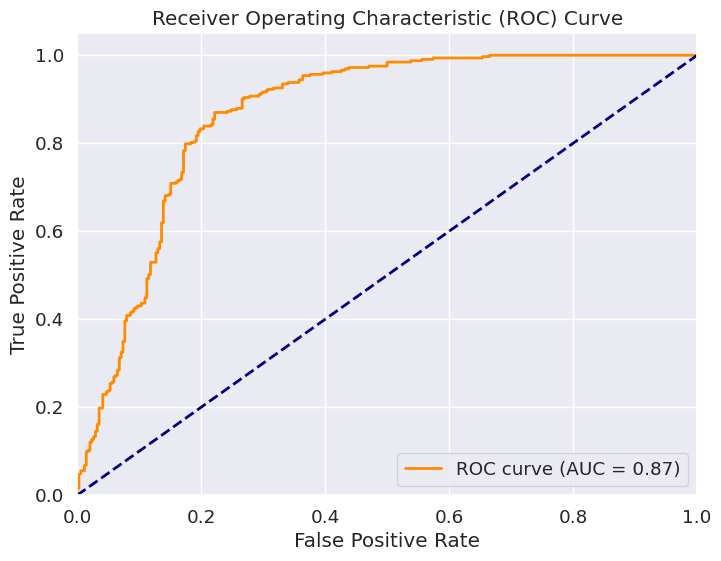

In [214]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [215]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7958579881656804
Recall: 0.8328173374613003
F1 score: 0.8139183055975793


### RBF SVM

In [216]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [217]:

y_pred = model.predict(X_test)

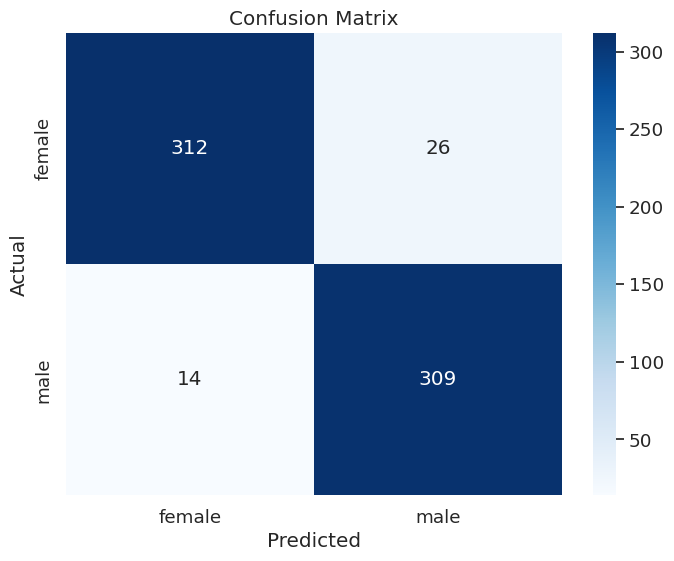

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [219]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       338
           1       0.92      0.96      0.94       323

    accuracy                           0.94       661
   macro avg       0.94      0.94      0.94       661
weighted avg       0.94      0.94      0.94       661



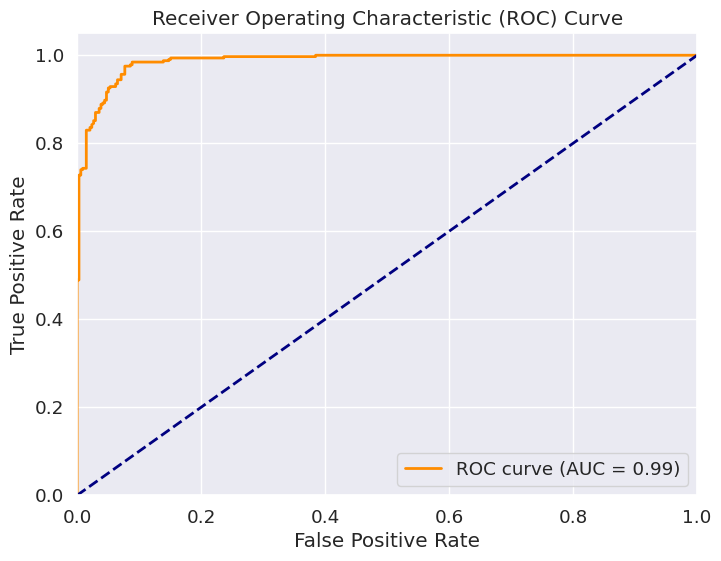

In [220]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [221]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.9223880597014925
Recall: 0.9566563467492261
F1 score: 0.939209726443769


### Logestic regresion

In [222]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [223]:

y_pred = model.predict(X_test)

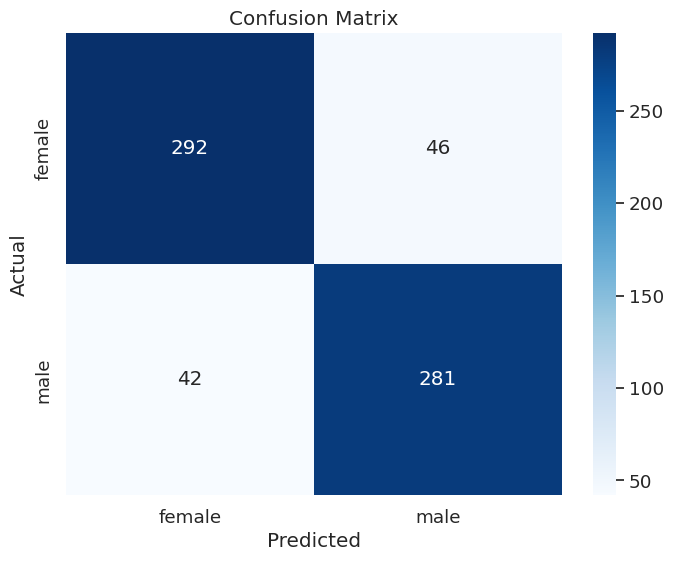

In [224]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [225]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.87       338
           1       0.86      0.87      0.86       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



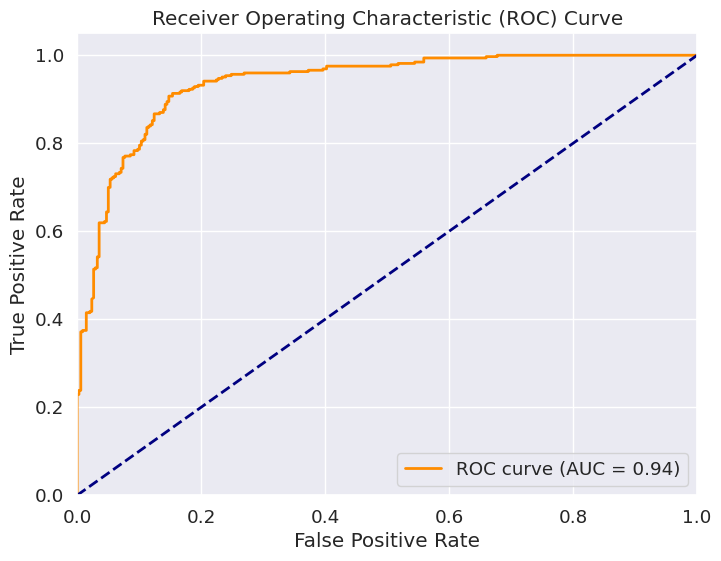

In [226]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [227]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8593272171253823
Recall: 0.8699690402476781
F1 score: 0.8646153846153847


### MLP

In [228]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [229]:

y_pred = model.predict(X_test)

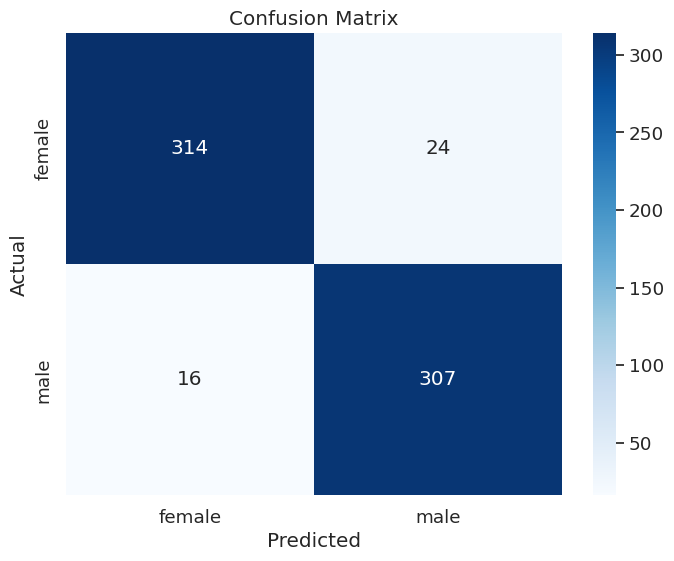

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [231]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       338
           1       0.93      0.95      0.94       323

    accuracy                           0.94       661
   macro avg       0.94      0.94      0.94       661
weighted avg       0.94      0.94      0.94       661



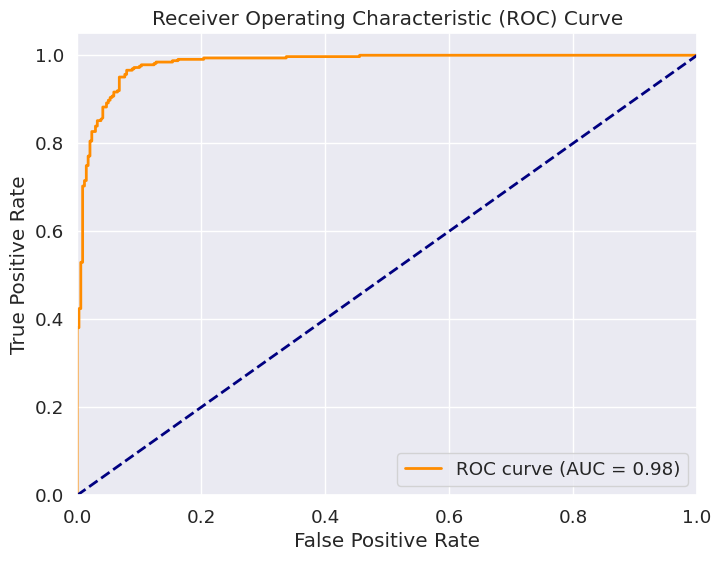

In [232]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [233]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.9274924471299094
Recall: 0.9504643962848297
F1 score: 0.9388379204892967


### Ensmbel Method

In [234]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [235]:
y_pred = model.predict(X_test)

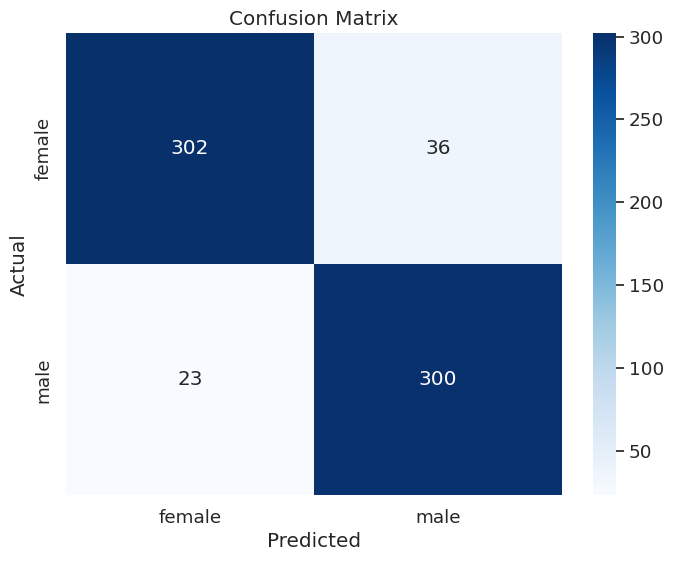

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [237]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       338
           1       0.89      0.93      0.91       323

    accuracy                           0.91       661
   macro avg       0.91      0.91      0.91       661
weighted avg       0.91      0.91      0.91       661



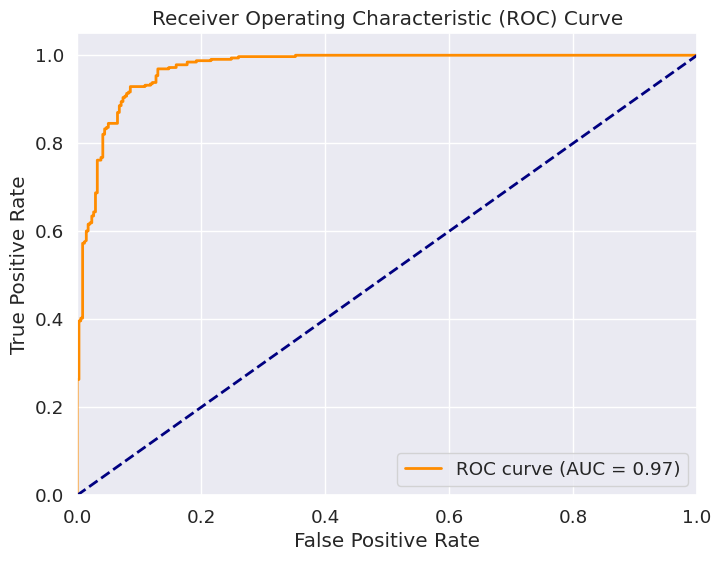

In [238]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [239]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8928571428571429
Recall: 0.9287925696594427
F1 score: 0.9104704097116844


## without Normalizition

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)



### liners SVM

In [241]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [242]:

y_pred = model.predict(X_test)

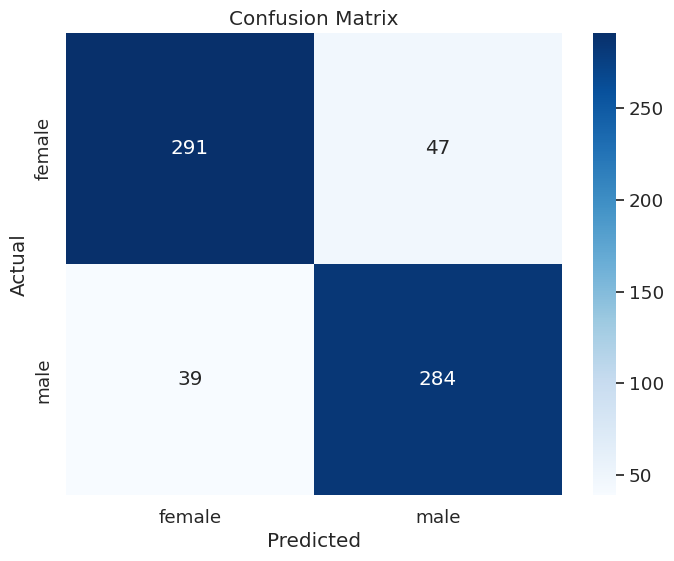

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [244]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.86      0.88      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



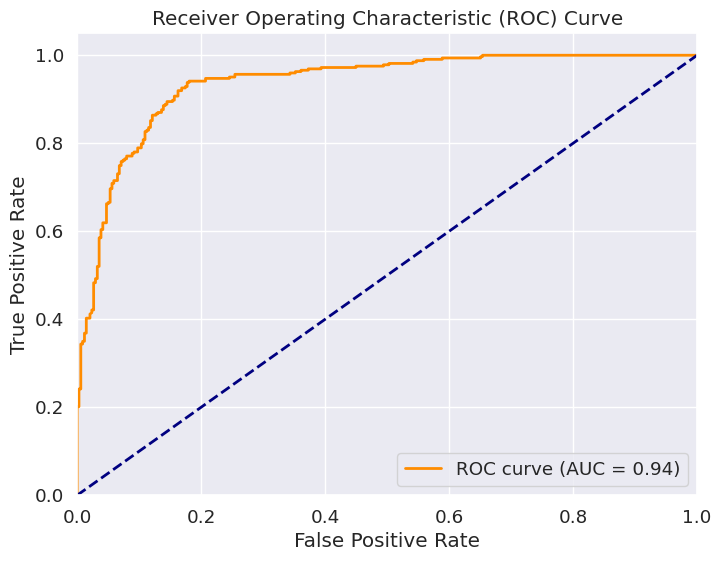

In [245]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [246]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8580060422960725
Recall: 0.8792569659442725
F1 score: 0.8685015290519877


### Naive Bayes

In [247]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [248]:

y_pred = model.predict(X_test)

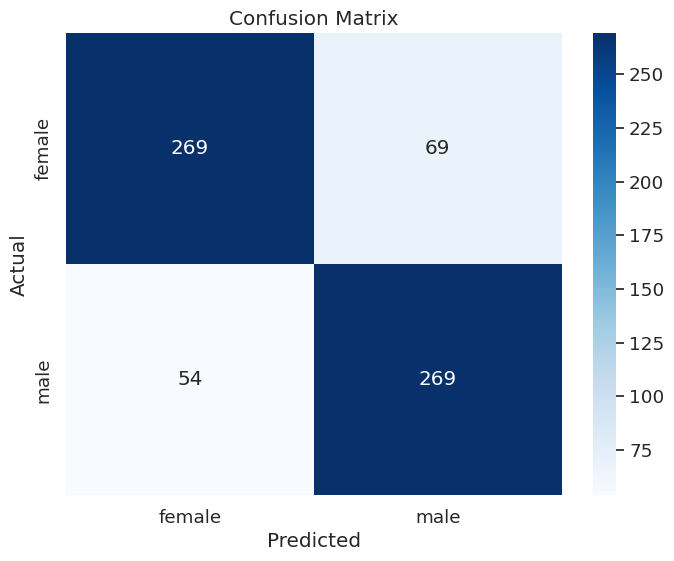

In [249]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [250]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81       338
           1       0.80      0.83      0.81       323

    accuracy                           0.81       661
   macro avg       0.81      0.81      0.81       661
weighted avg       0.81      0.81      0.81       661



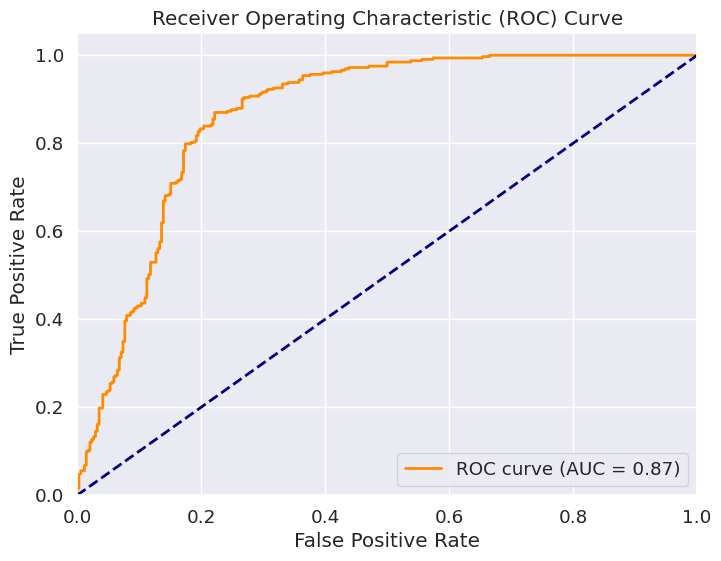

In [251]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [252]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7958579881656804
Recall: 0.8328173374613003
F1 score: 0.8139183055975793


### RBF SVM

In [253]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [254]:

y_pred = model.predict(X_test)

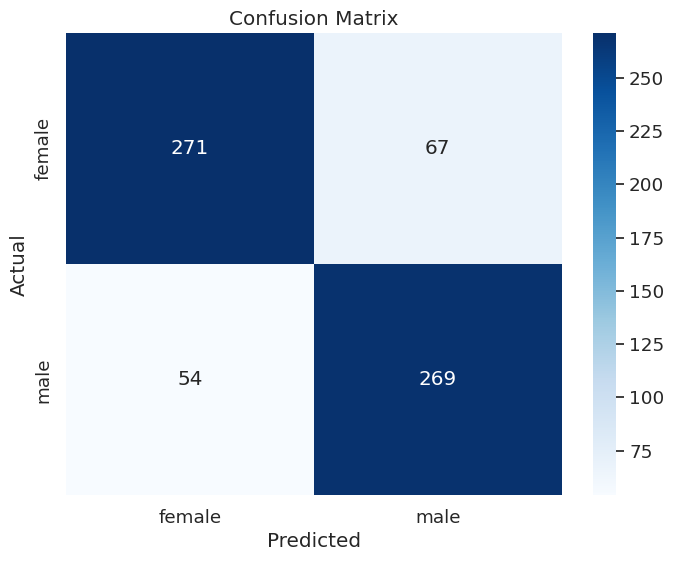

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [256]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       338
           1       0.80      0.83      0.82       323

    accuracy                           0.82       661
   macro avg       0.82      0.82      0.82       661
weighted avg       0.82      0.82      0.82       661



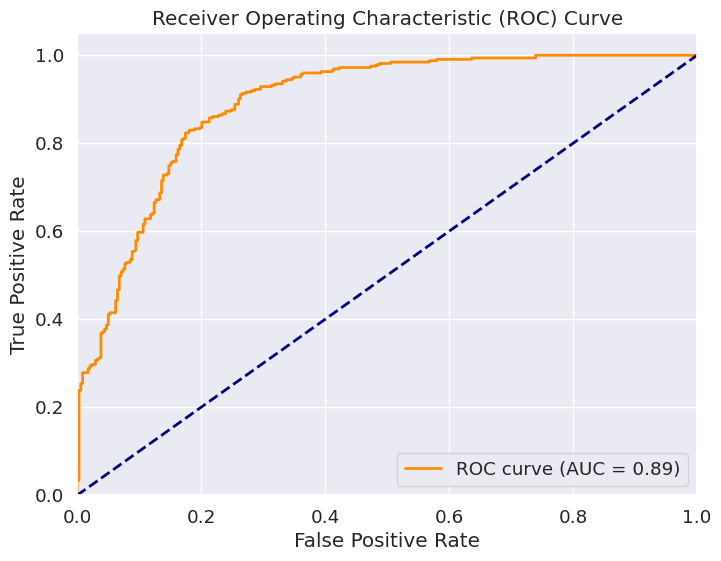

In [257]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [258]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8005952380952381
Recall: 0.8328173374613003
F1 score: 0.8163884673748104


### Logestic regresion

In [259]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [260]:

y_pred = model.predict(X_test)

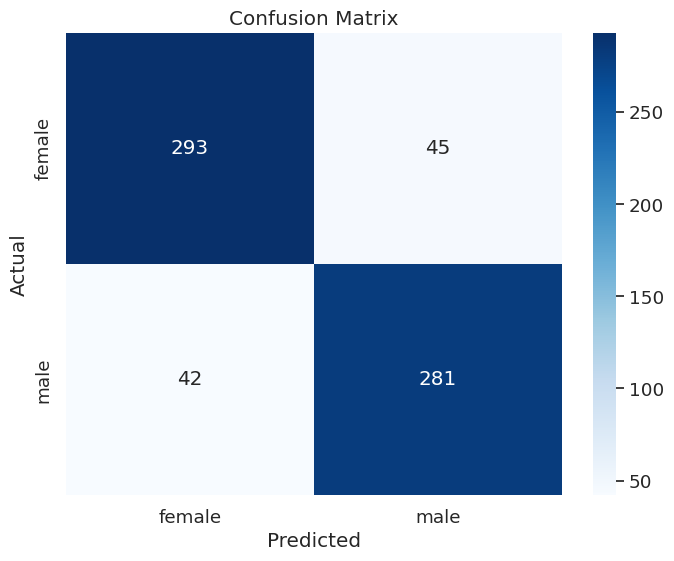

In [261]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [262]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       338
           1       0.86      0.87      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



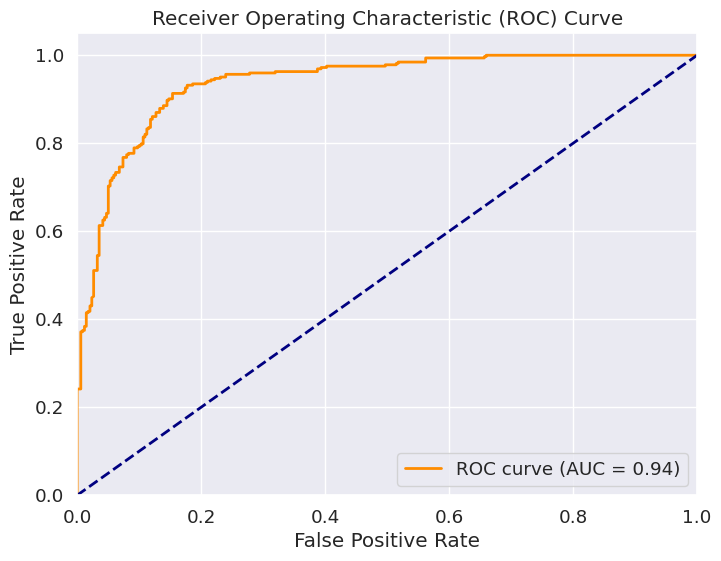

In [263]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [264]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8619631901840491
Recall: 0.8699690402476781
F1 score: 0.8659476117103238


### MLP

In [265]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



MLPClassifier()

In [266]:

y_pred = model.predict(X_test)

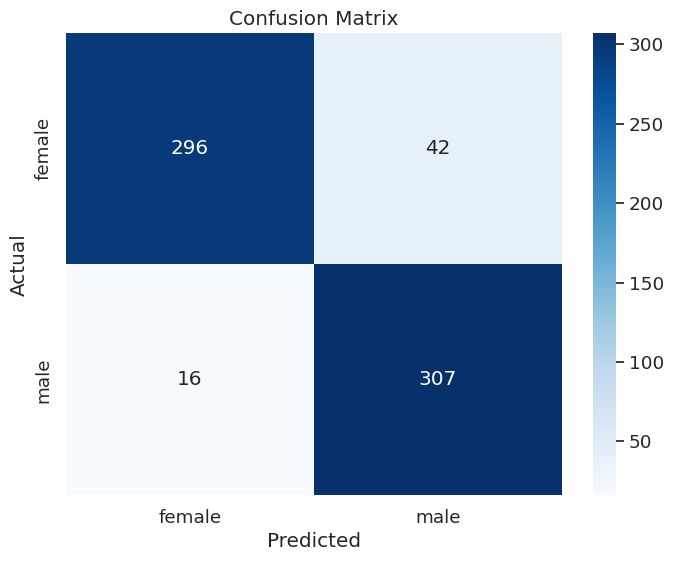

In [267]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [268]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       338
           1       0.88      0.95      0.91       323

    accuracy                           0.91       661
   macro avg       0.91      0.91      0.91       661
weighted avg       0.91      0.91      0.91       661



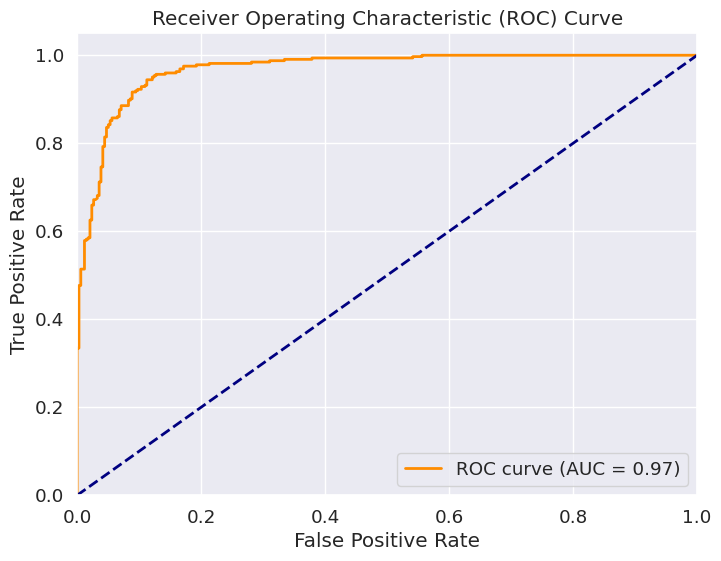

In [269]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [270]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8796561604584527
Recall: 0.9504643962848297
F1 score: 0.9136904761904762


### Ensmbel Method

In [271]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [272]:
y_pred = model.predict(X_test)

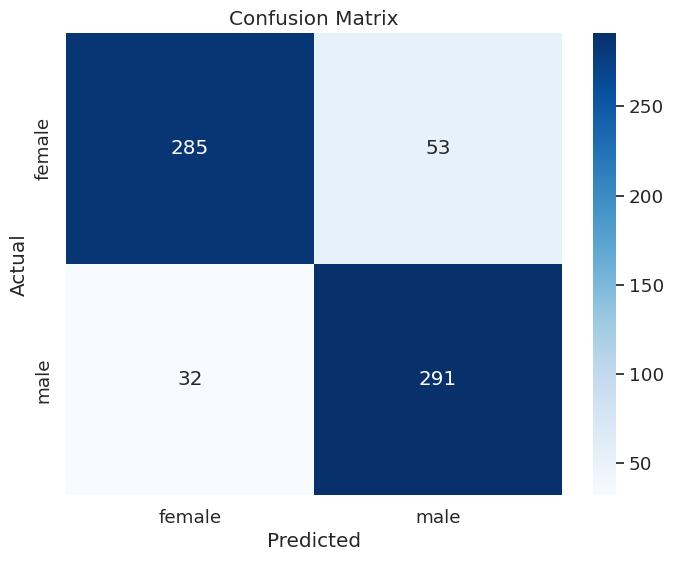

In [273]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [274]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       338
           1       0.85      0.90      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



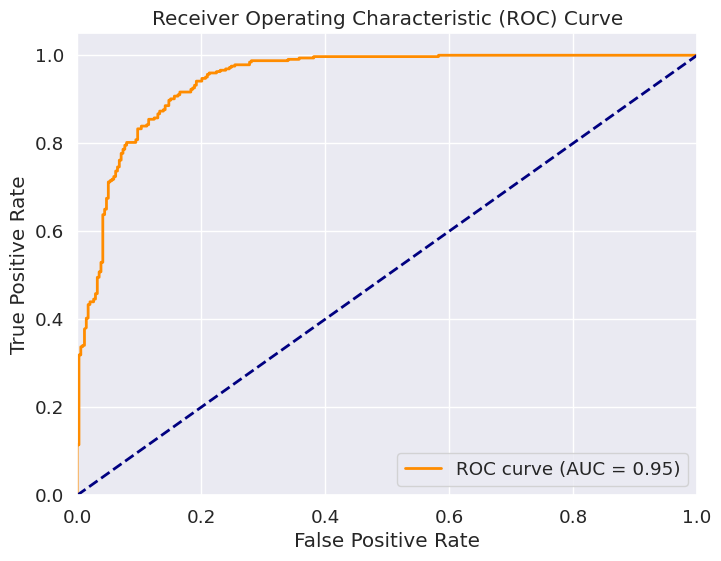

In [275]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [276]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8459302325581395
Recall: 0.9009287925696594
F1 score: 0.8725637181409295


# PCA

In [277]:
from sklearn.decomposition import PCA
n_components = 2  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_resampled)


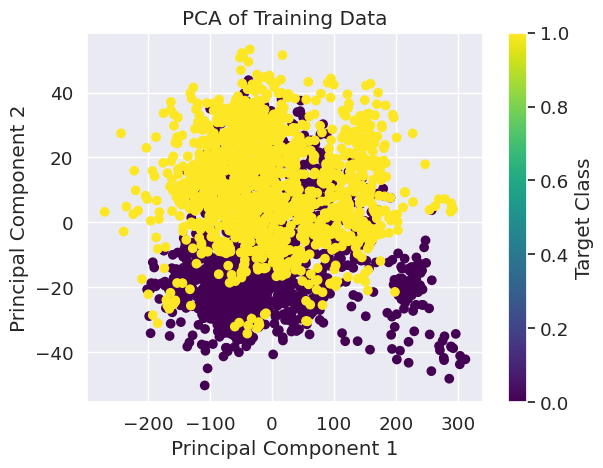

In [278]:
import matplotlib.pyplot as plt

# Assuming X_train_pca is your transformed data after PCA
# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='viridis')  # Assuming y_train is your target labels
plt.title('PCA of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target Class')
plt.show()


In [279]:
from sklearn.decomposition import PCA
n_components = 5  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_resampled)

## Normalized

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.25, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)


### liners SVM

In [281]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [282]:

y_pred = model.predict(X_test)

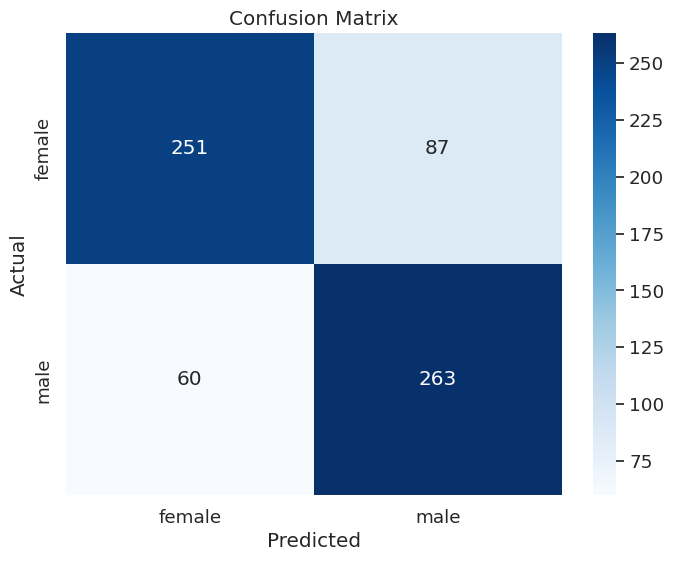

In [283]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [284]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       338
           1       0.75      0.81      0.78       323

    accuracy                           0.78       661
   macro avg       0.78      0.78      0.78       661
weighted avg       0.78      0.78      0.78       661



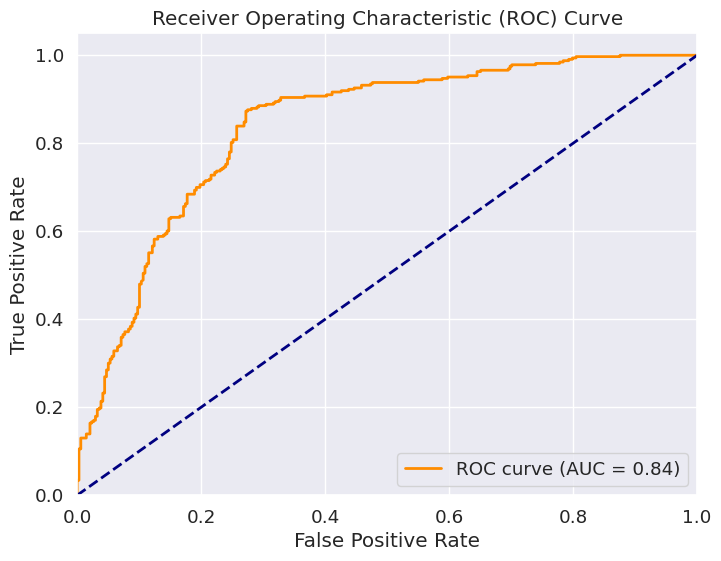

In [285]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [286]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7514285714285714
Recall: 0.8142414860681114
F1 score: 0.7815750371471025


### Naive Bayes

In [287]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [288]:

y_pred = model.predict(X_test)

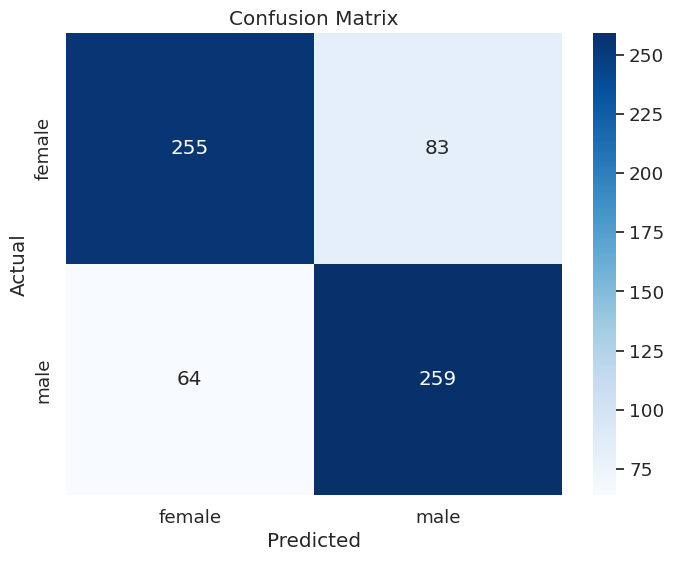

In [289]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [290]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       338
           1       0.76      0.80      0.78       323

    accuracy                           0.78       661
   macro avg       0.78      0.78      0.78       661
weighted avg       0.78      0.78      0.78       661



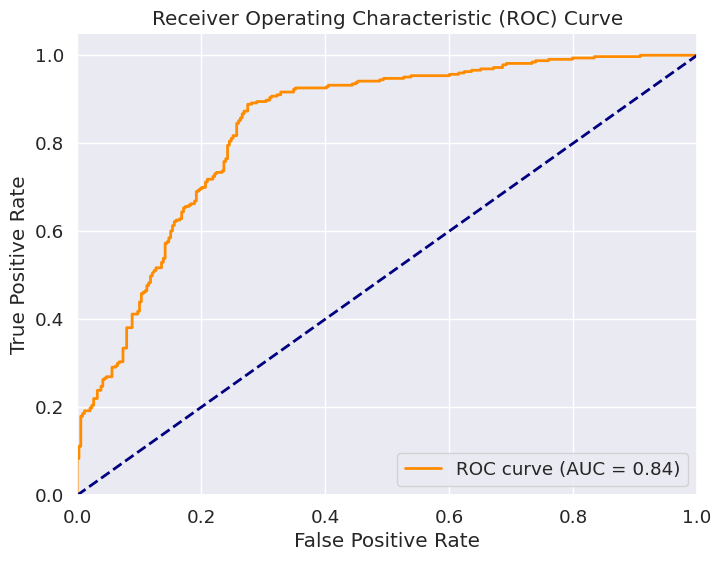

In [291]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [292]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7573099415204678
Recall: 0.8018575851393189
F1 score: 0.7789473684210526


### RBF SVM

In [293]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [294]:

y_pred = model.predict(X_test)

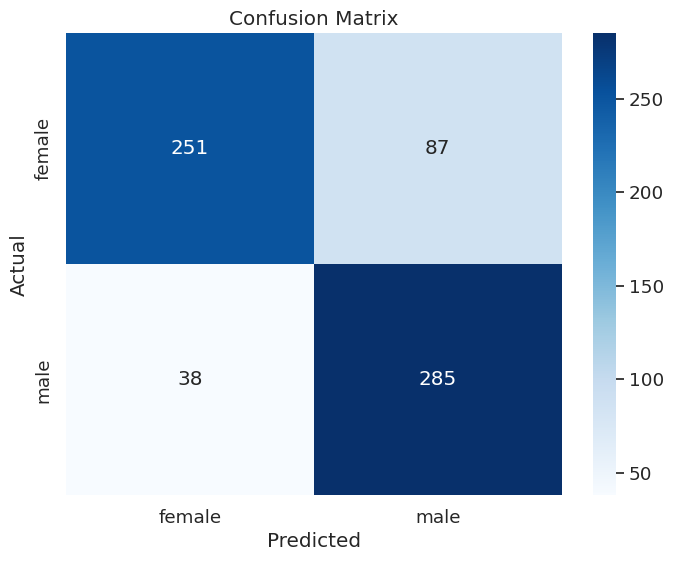

In [295]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [296]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.74      0.80       338
           1       0.77      0.88      0.82       323

    accuracy                           0.81       661
   macro avg       0.82      0.81      0.81       661
weighted avg       0.82      0.81      0.81       661



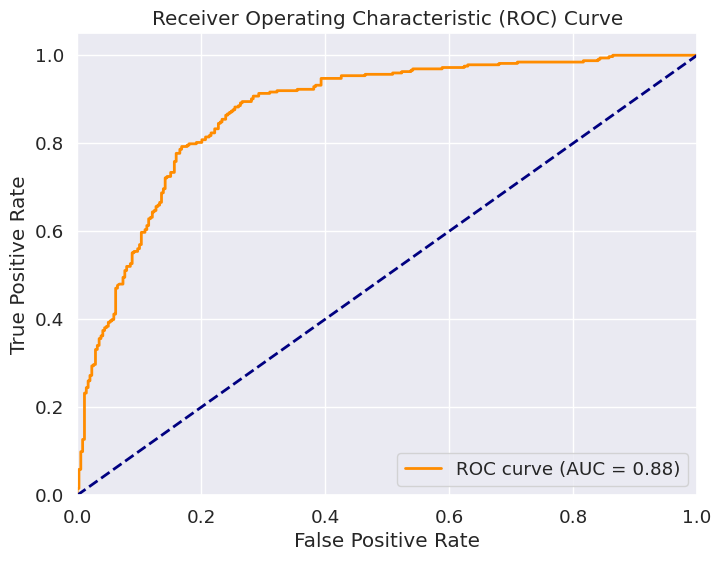

In [297]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [298]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7661290322580645
Recall: 0.8823529411764706
F1 score: 0.8201438848920862


### Logestic regresion

In [299]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [300]:

y_pred = model.predict(X_test)

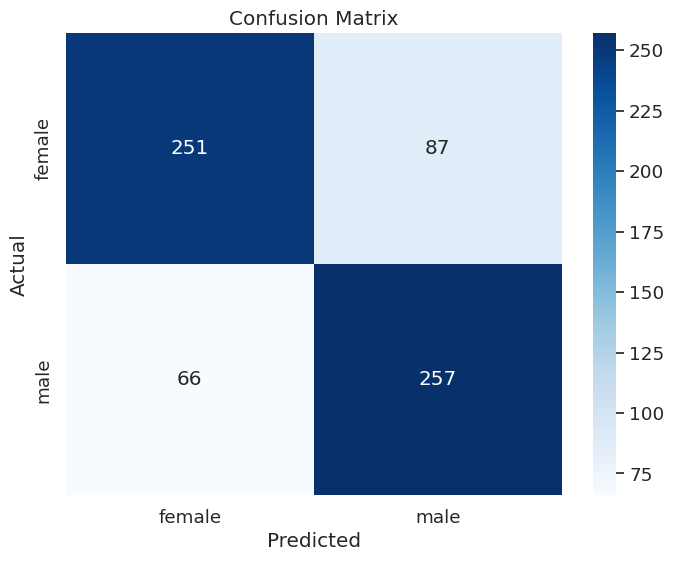

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [302]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       338
           1       0.75      0.80      0.77       323

    accuracy                           0.77       661
   macro avg       0.77      0.77      0.77       661
weighted avg       0.77      0.77      0.77       661



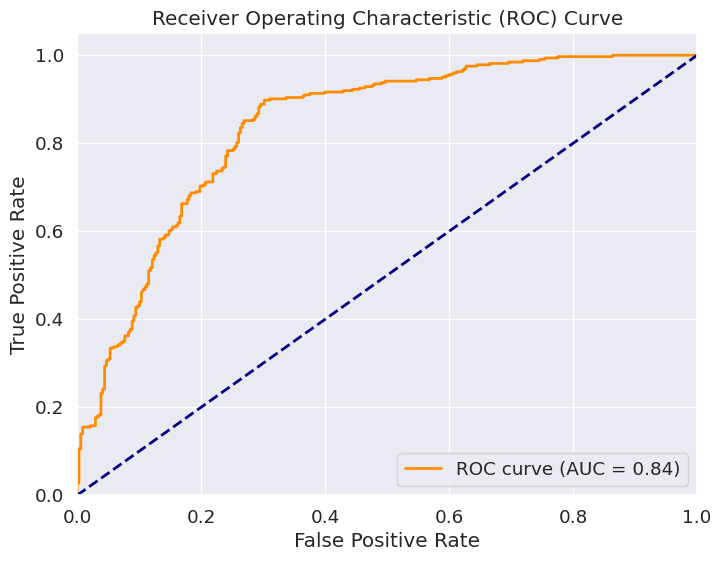

In [303]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [304]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.747093023255814
Recall: 0.7956656346749226
F1 score: 0.770614692653673


### MLP

In [305]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [306]:

y_pred = model.predict(X_test)

In [307]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [308]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       338
           1       0.78      0.87      0.82       323

    accuracy                           0.82       661
   macro avg       0.82      0.82      0.82       661
weighted avg       0.82      0.82      0.82       661



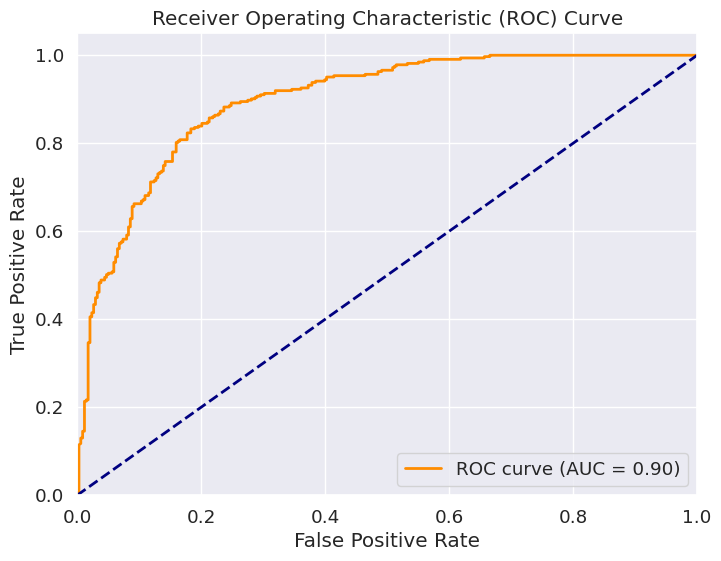

In [309]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [310]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7821229050279329
Recall: 0.8668730650154799
F1 score: 0.8223201174743024


### Ensmbel Method

In [311]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [312]:
y_pred = model.predict(X_test)

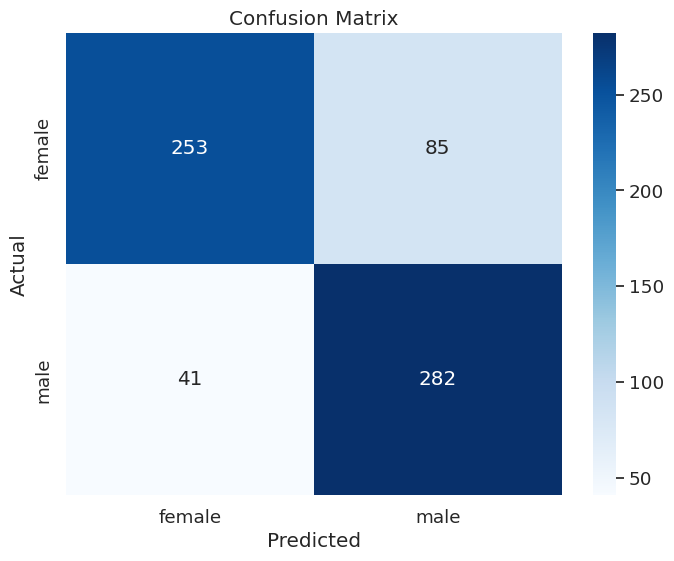

In [313]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [314]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       338
           1       0.77      0.87      0.82       323

    accuracy                           0.81       661
   macro avg       0.81      0.81      0.81       661
weighted avg       0.82      0.81      0.81       661



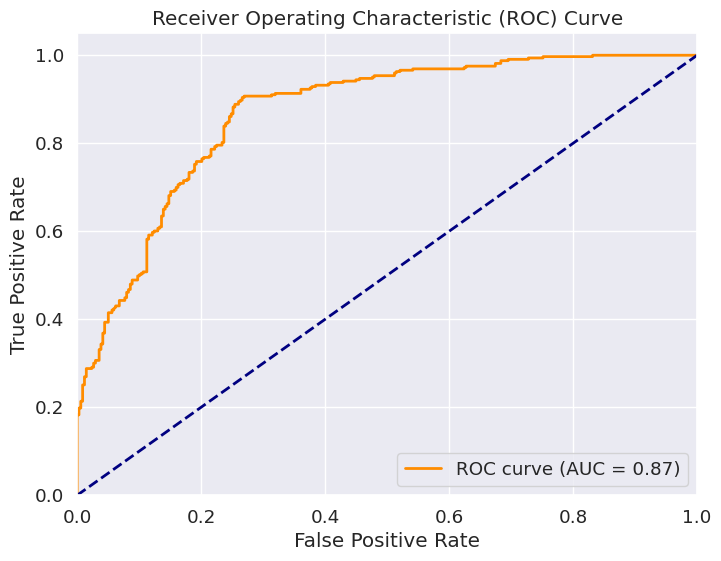

In [315]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [316]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7683923705722071
Recall: 0.8730650154798761
F1 score: 0.8173913043478261


## without Normalizition

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.25, random_state=42)



### liners SVM

In [318]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [319]:

y_pred = model.predict(X_test)

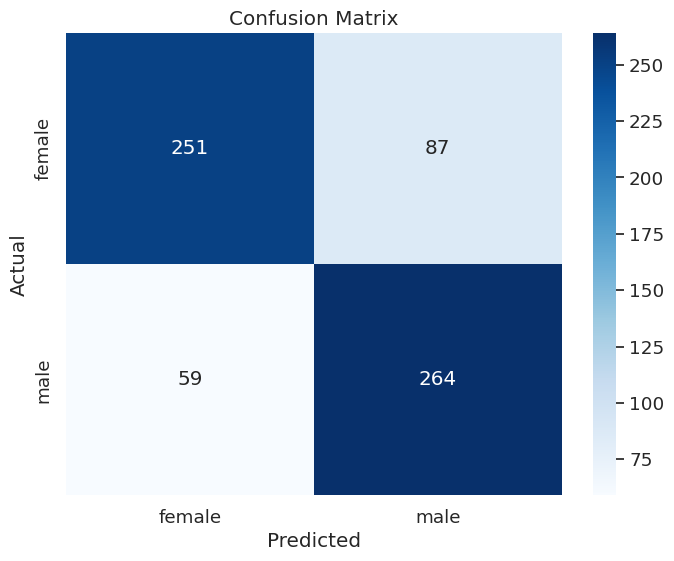

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [321]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       338
           1       0.75      0.82      0.78       323

    accuracy                           0.78       661
   macro avg       0.78      0.78      0.78       661
weighted avg       0.78      0.78      0.78       661



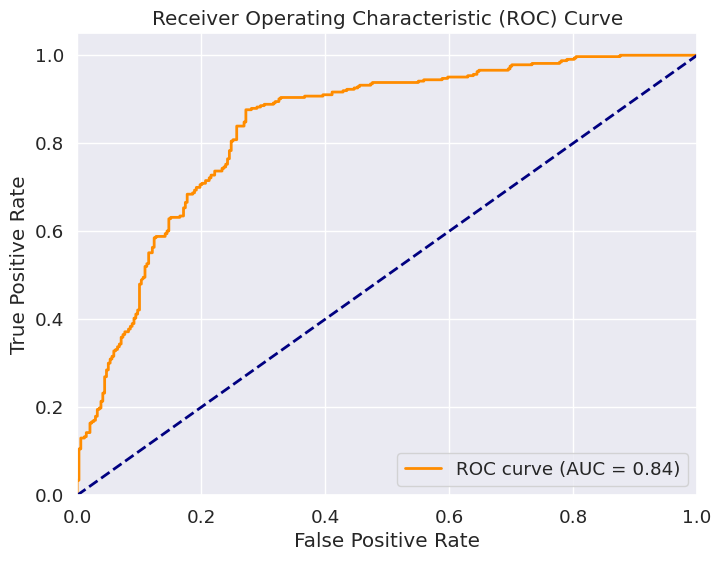

In [322]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [323]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7521367521367521
Recall: 0.8173374613003096
F1 score: 0.7833827893175074


### Naive Bayes

In [324]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [325]:

y_pred = model.predict(X_test)

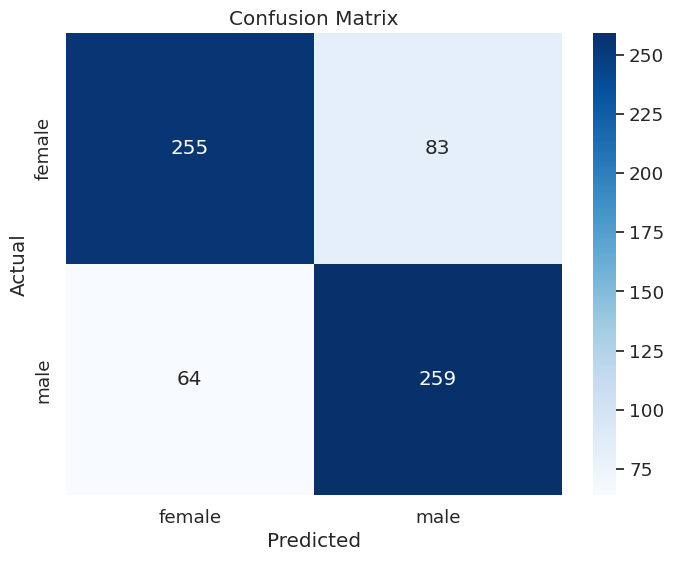

In [326]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [327]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       338
           1       0.76      0.80      0.78       323

    accuracy                           0.78       661
   macro avg       0.78      0.78      0.78       661
weighted avg       0.78      0.78      0.78       661



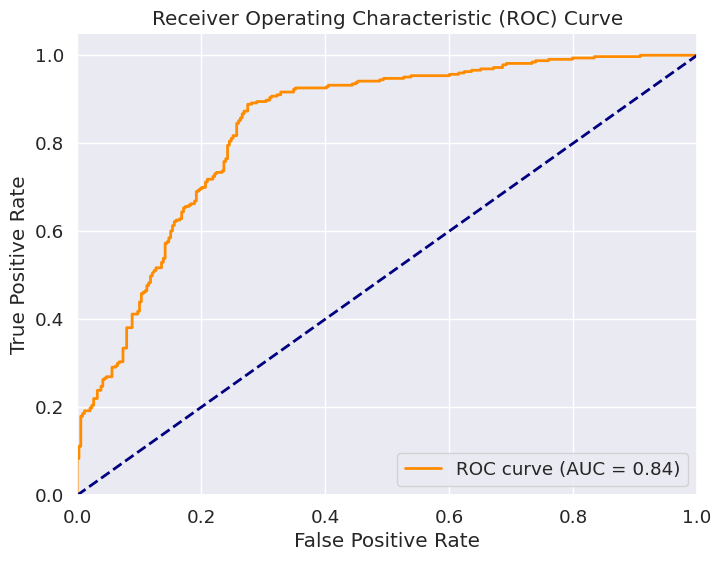

In [328]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [329]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7573099415204678
Recall: 0.8018575851393189
F1 score: 0.7789473684210526


### RBF SVM

In [330]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [331]:

y_pred = model.predict(X_test)

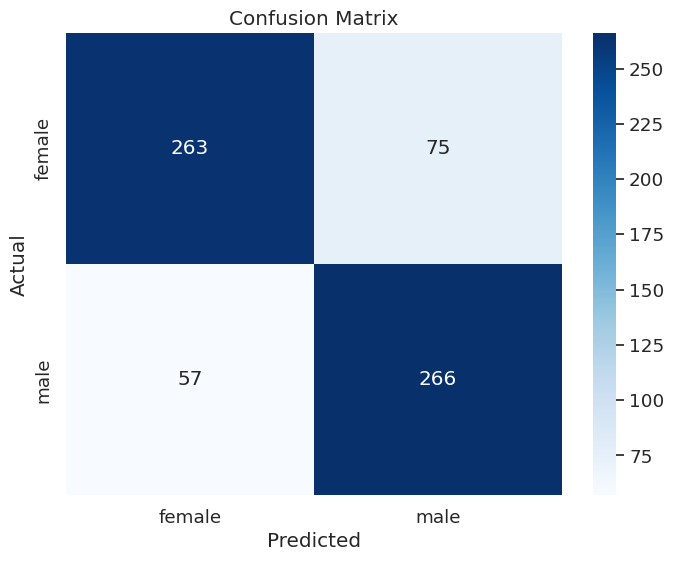

In [332]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [333]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       338
           1       0.78      0.82      0.80       323

    accuracy                           0.80       661
   macro avg       0.80      0.80      0.80       661
weighted avg       0.80      0.80      0.80       661



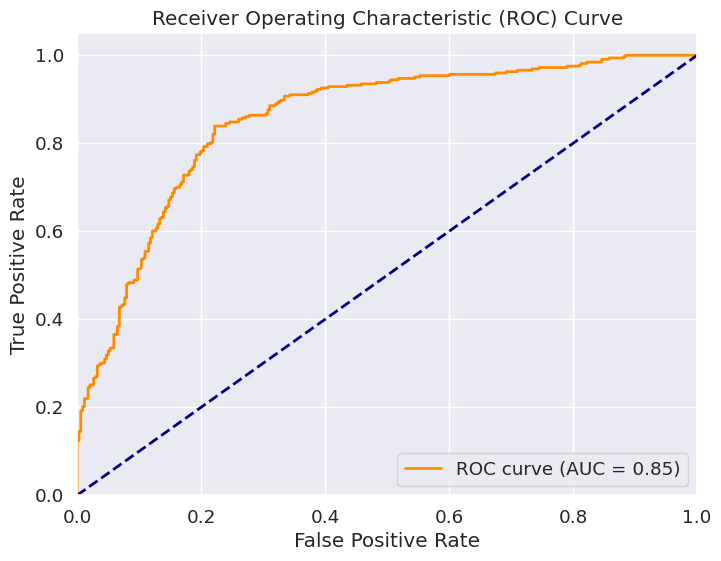

In [334]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [335]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7800586510263929
Recall: 0.8235294117647058
F1 score: 0.8012048192771084


### Logestic regresion

In [336]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [337]:

y_pred = model.predict(X_test)

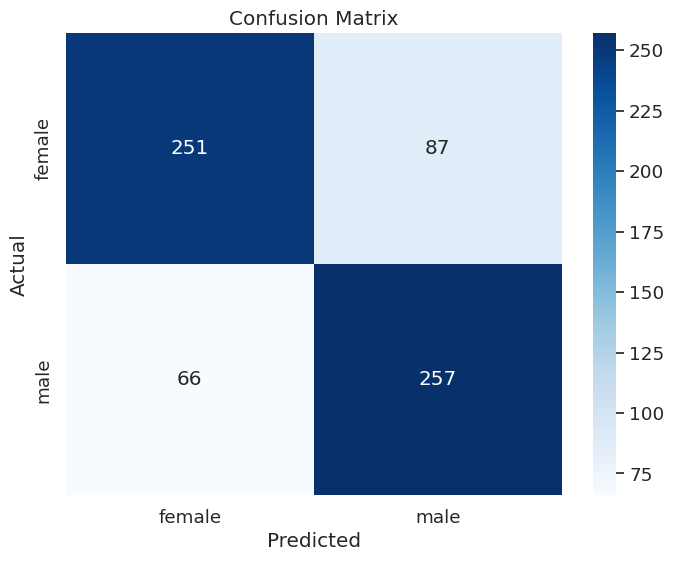

In [338]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [339]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       338
           1       0.75      0.80      0.77       323

    accuracy                           0.77       661
   macro avg       0.77      0.77      0.77       661
weighted avg       0.77      0.77      0.77       661



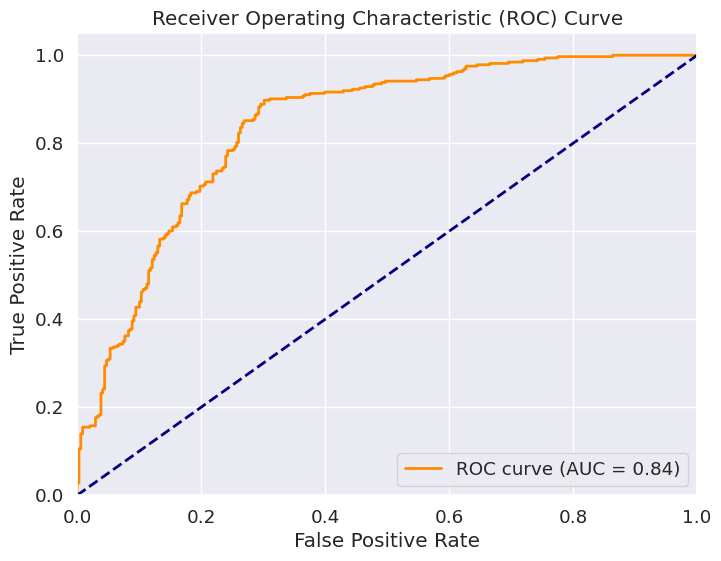

In [340]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [341]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.747093023255814
Recall: 0.7956656346749226
F1 score: 0.770614692653673


### MLP

In [342]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



MLPClassifier()

In [343]:

y_pred = model.predict(X_test)

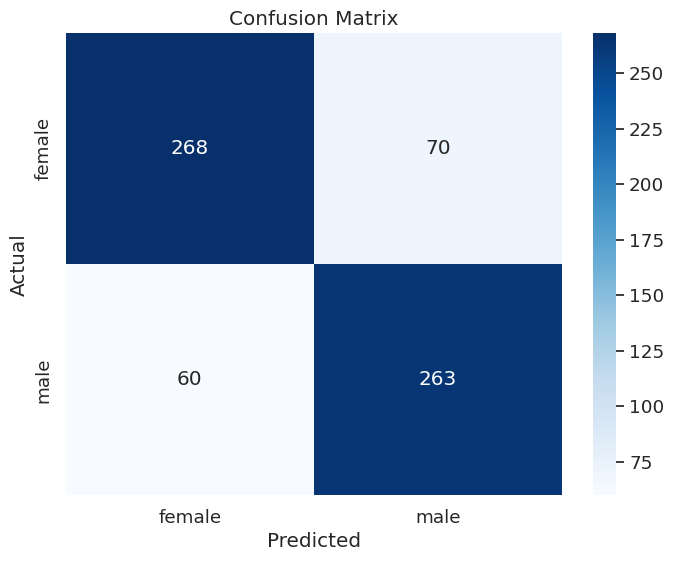

In [344]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [345]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       338
           1       0.79      0.81      0.80       323

    accuracy                           0.80       661
   macro avg       0.80      0.80      0.80       661
weighted avg       0.80      0.80      0.80       661



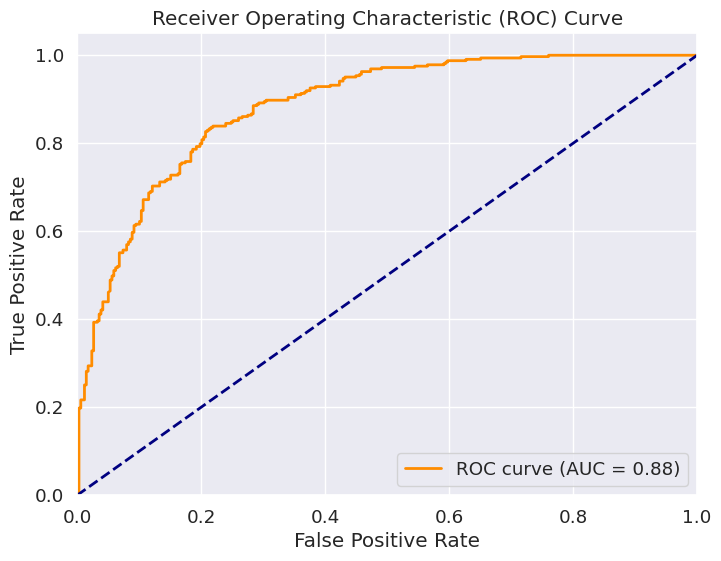

In [346]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [347]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7897897897897898
Recall: 0.8142414860681114
F1 score: 0.8018292682926829


### Ensmbel Method

In [348]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [349]:
y_pred = model.predict(X_test)

In [350]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [351]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       338
           1       0.77      0.85      0.80       323

    accuracy                           0.80       661
   macro avg       0.80      0.80      0.80       661
weighted avg       0.80      0.80      0.80       661



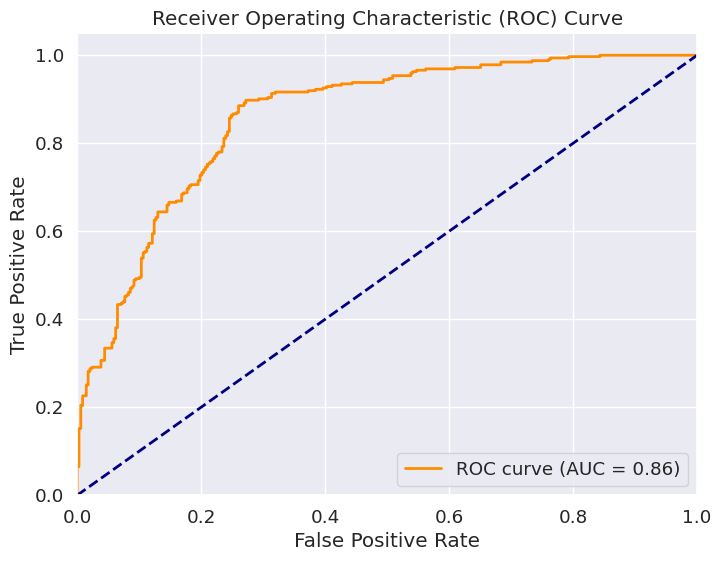

In [352]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [353]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.7668539325842697
Recall: 0.8452012383900929
F1 score: 0.8041237113402062


# LDA

In [354]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_resampled, y_resampled)

## Normalized

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_resampled, test_size=0.25, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test = scaler.transform(X_test)


### liners SVM

In [356]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [357]:

y_pred = model.predict(X_test)

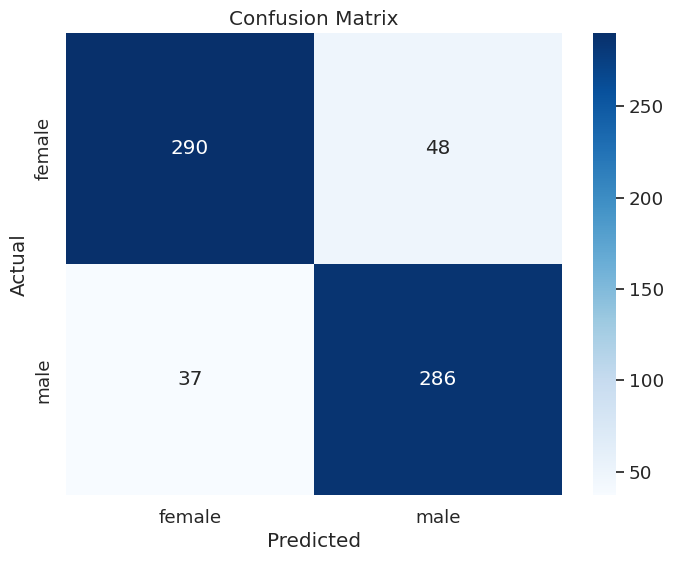

In [358]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [359]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       338
           1       0.86      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



In [360]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [361]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8562874251497006
Recall: 0.8854489164086687
F1 score: 0.8706240487062404


### Naive Bayes

In [362]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [363]:

y_pred = model.predict(X_test)

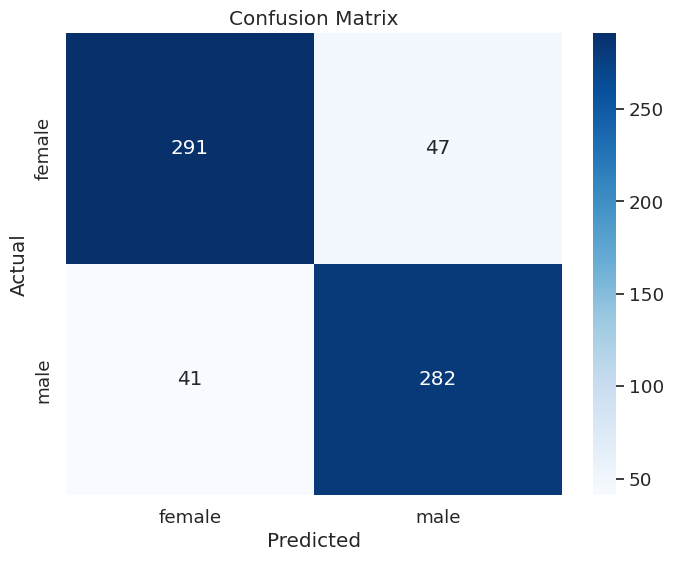

In [364]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [365]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.86      0.87      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



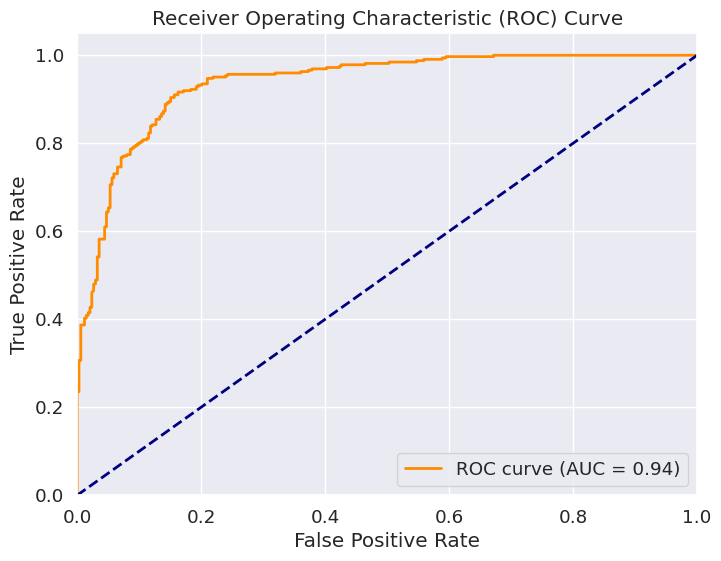

In [366]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [367]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8571428571428571
Recall: 0.8730650154798761
F1 score: 0.8650306748466258


### RBF SVM

In [368]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [369]:

y_pred = model.predict(X_test)

In [370]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [371]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       338
           1       0.85      0.90      0.88       323

    accuracy                           0.88       661
   macro avg       0.88      0.88      0.88       661
weighted avg       0.88      0.88      0.88       661



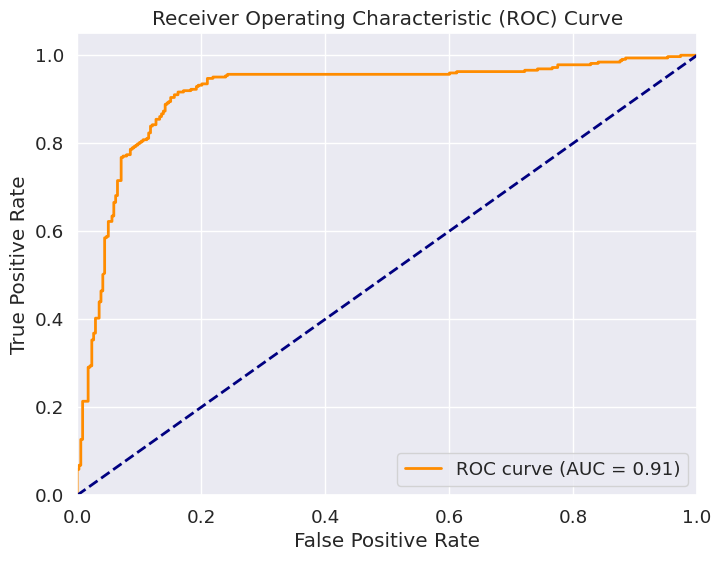

In [372]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [373]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8513119533527697
Recall: 0.9040247678018576
F1 score: 0.8768768768768769


### Logestic regresion

In [374]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [375]:

y_pred = model.predict(X_test)

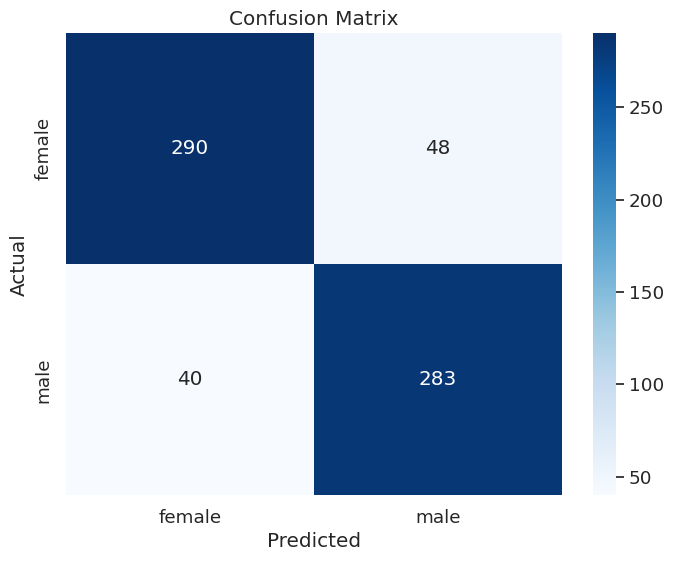

In [376]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [377]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.85      0.88      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



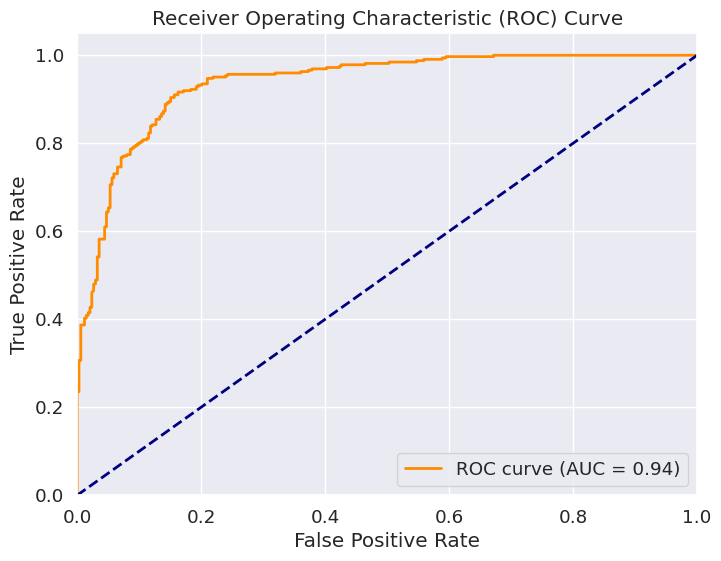

In [378]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [379]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8549848942598187
Recall: 0.8761609907120743
F1 score: 0.8654434250764526


### MLP

In [380]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



MLPClassifier()

In [381]:

y_pred = model.predict(X_test)

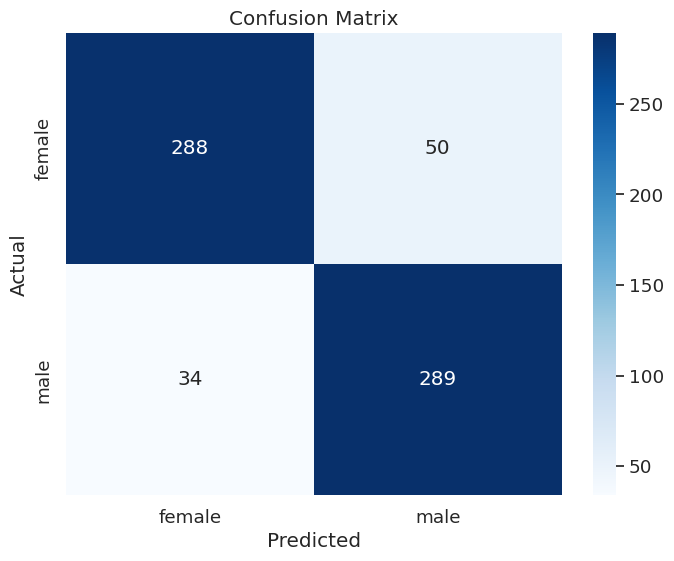

In [382]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [383]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       338
           1       0.85      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



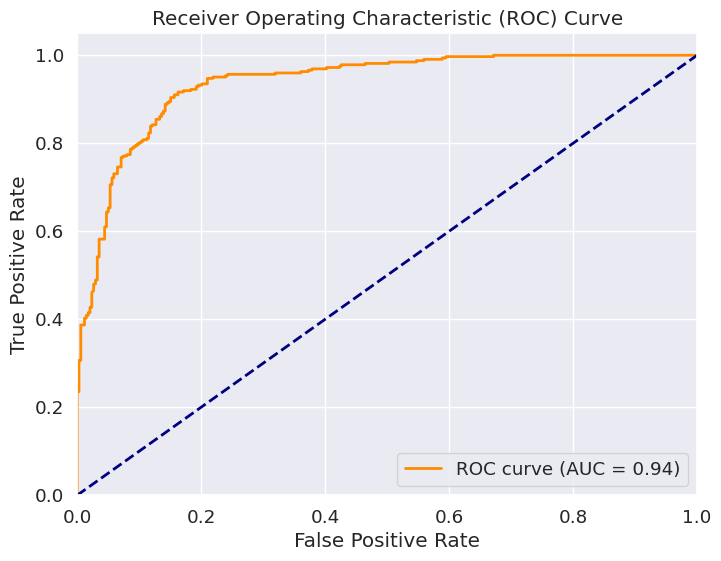

In [384]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [385]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8525073746312685
Recall: 0.8947368421052632
F1 score: 0.8731117824773413


### Ensmbel Method

In [386]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [387]:
y_pred = model.predict(X_test)

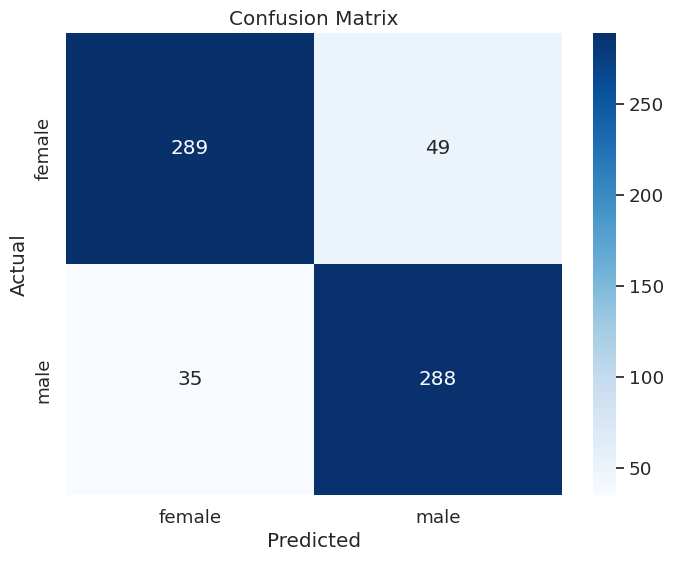

In [388]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [389]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       338
           1       0.85      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



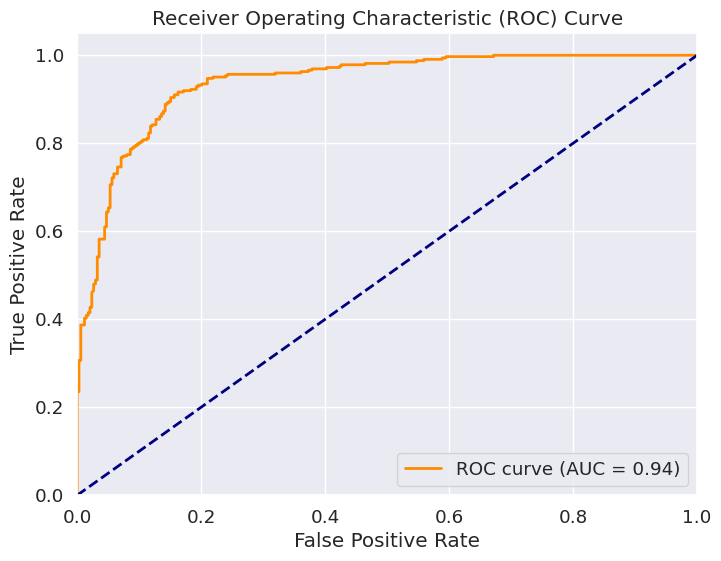

In [390]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [391]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8545994065281899
Recall: 0.891640866873065
F1 score: 0.8727272727272727


## without Normalizition

In [392]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lda, y_resampled, test_size=0.25, random_state=42)



### liners SVM

In [393]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [394]:

y_pred = model.predict(X_test)

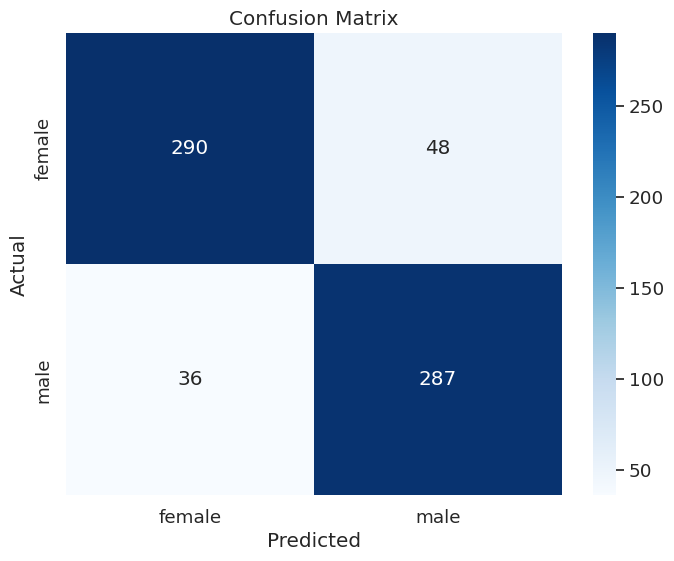

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [396]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       338
           1       0.86      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



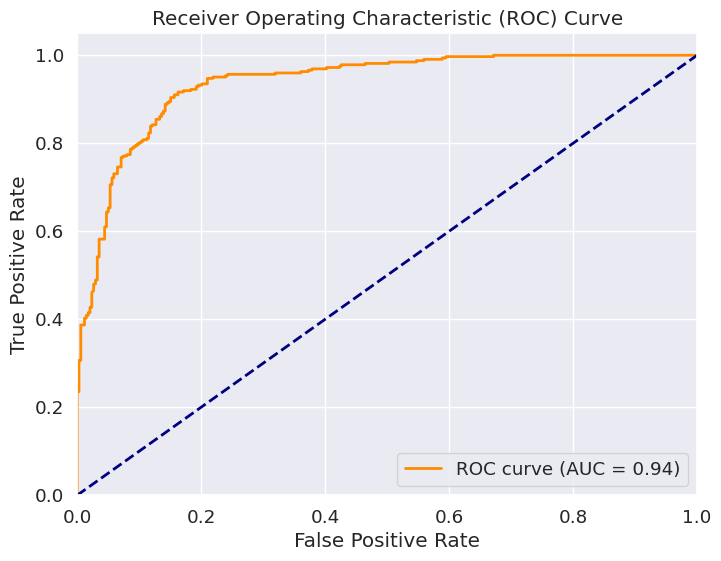

In [397]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [398]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8567164179104477
Recall: 0.8885448916408669
F1 score: 0.872340425531915


### Naive Bayes

In [399]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [400]:

y_pred = model.predict(X_test)

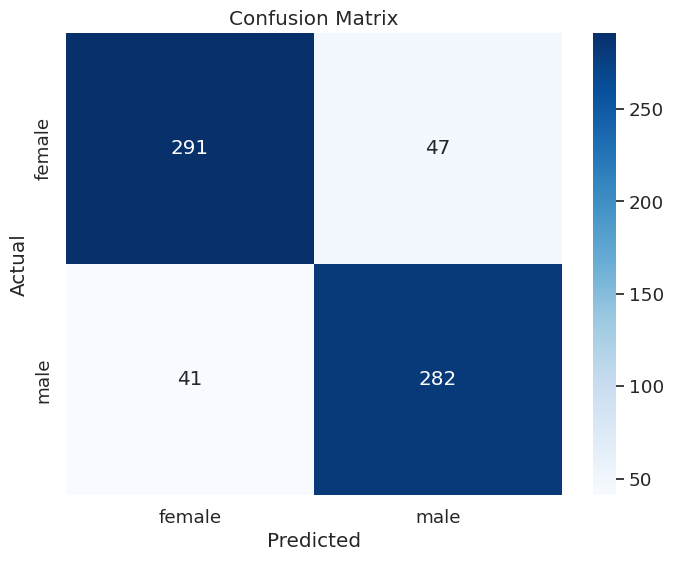

In [401]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [402]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.86      0.87      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



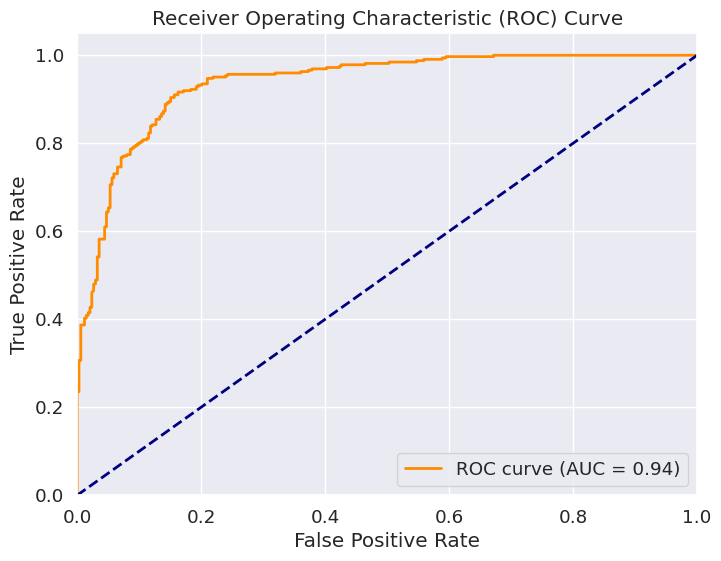

In [403]:

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Assuming binary classification, take probabilities of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [404]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8571428571428571
Recall: 0.8730650154798761
F1 score: 0.8650306748466258


### RBF SVM

In [405]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [406]:

y_pred = model.predict(X_test)

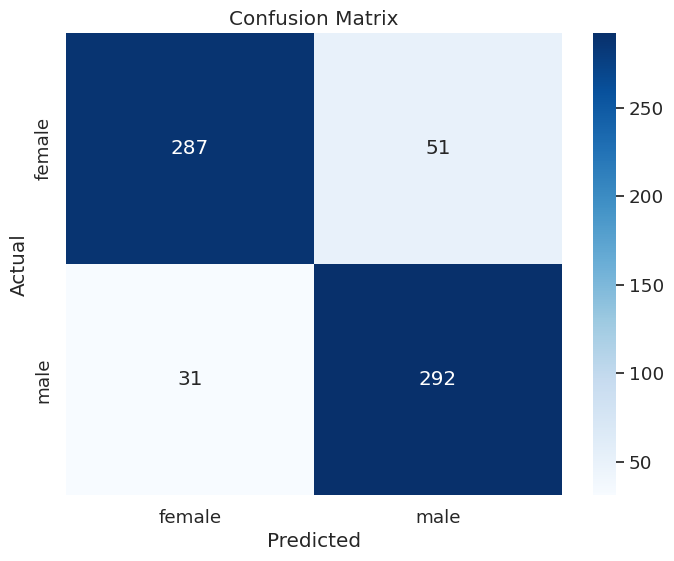

In [407]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [408]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       338
           1       0.85      0.90      0.88       323

    accuracy                           0.88       661
   macro avg       0.88      0.88      0.88       661
weighted avg       0.88      0.88      0.88       661



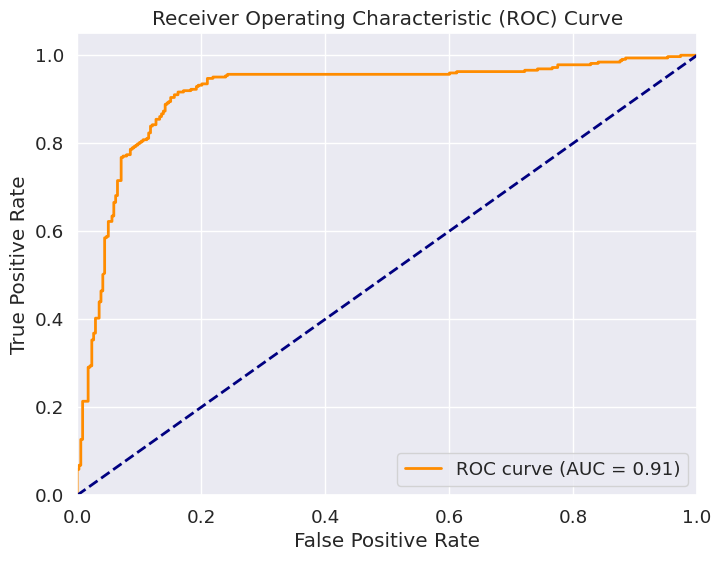

In [409]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [410]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8513119533527697
Recall: 0.9040247678018576
F1 score: 0.8768768768768769


### Logestic regresion

In [411]:
from sklearn.linear_model import LogisticRegression

# Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [412]:

y_pred = model.predict(X_test)

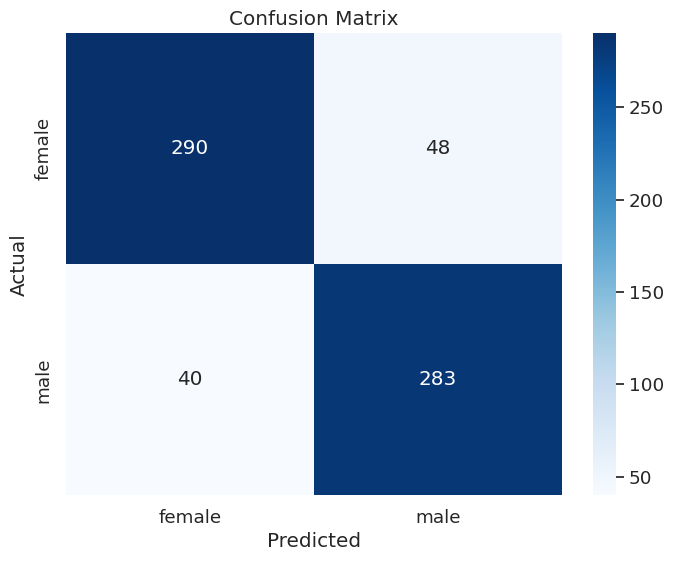

In [413]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [414]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       338
           1       0.85      0.88      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



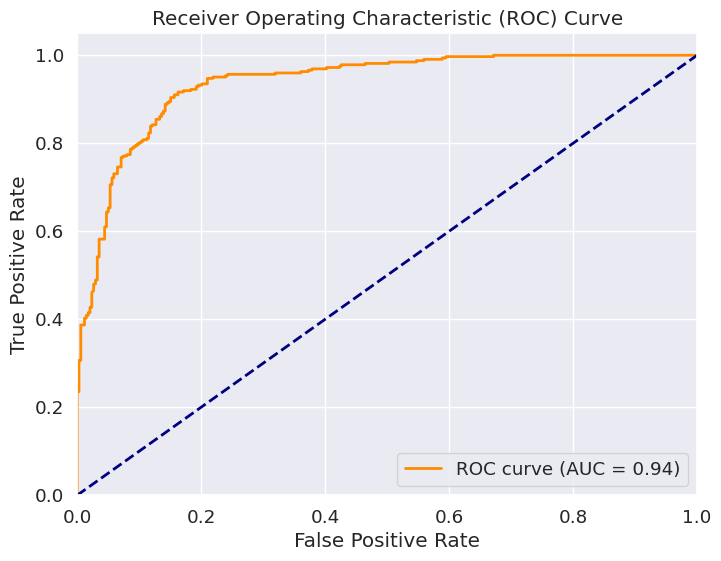

In [415]:

# Predict probabilities for the test data
y_probs = model.decision_function(X_test)

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [416]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8549848942598187
Recall: 0.8761609907120743
F1 score: 0.8654434250764526


### MLP

In [417]:
from sklearn.neural_network import MLPClassifier

# Create and train the MLP Classifier model
model = MLPClassifier()
model.fit(X_train, y_train)



MLPClassifier()

In [418]:

y_pred = model.predict(X_test)

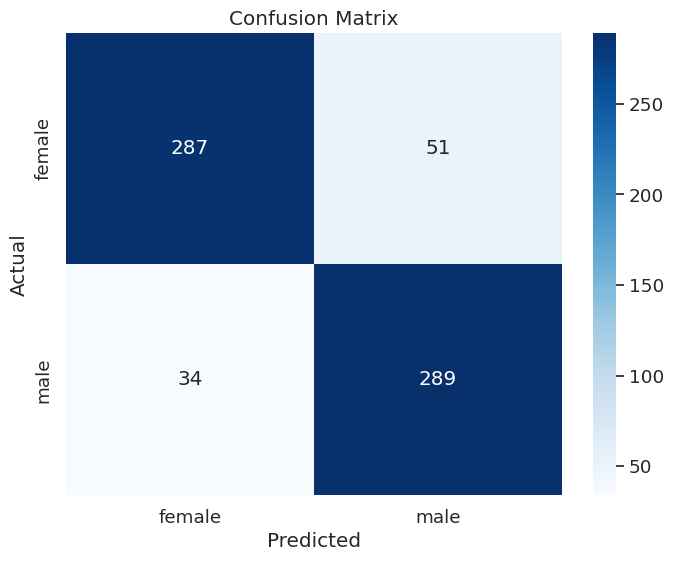

In [419]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [420]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87       338
           1       0.85      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



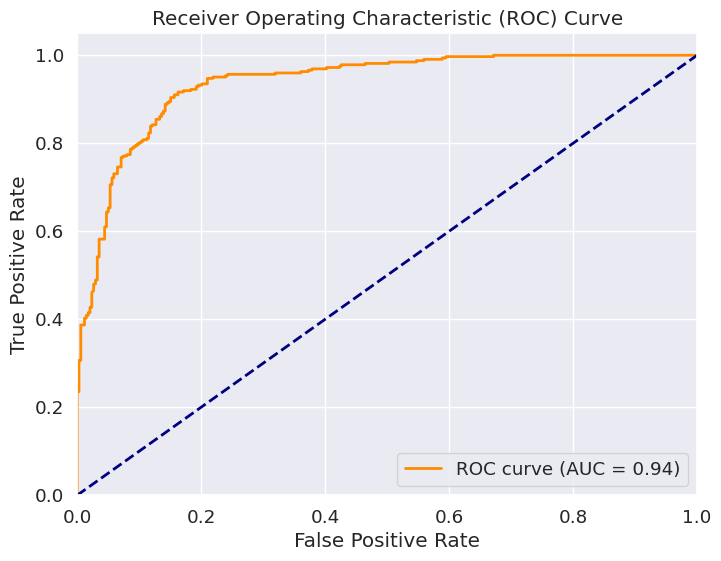

In [421]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [422]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.85
Recall: 0.8947368421052632
F1 score: 0.8717948717948718


### Ensmbel Method

In [423]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define individual classifiers
mlp = MLPClassifier()
nb = GaussianNB()
lr = LogisticRegression()
svm_linear = SVC(kernel='linear', probability=True)  # Set probability to True
svm_rbf = SVC(kernel='rbf', probability=True)

# Create an ensemble using a VotingClassifier
model = VotingClassifier(estimators=[
    ('mlp', mlp),
    ('nb', nb),
    ('lr', lr),
    ('svm_linear', svm_linear),
    ('svm_rbf', svm_rbf)
], voting='soft')

model.fit(X_train, y_train)



VotingClassifier(estimators=[('mlp', MLPClassifier()), ('nb', GaussianNB()),
                             ('lr', LogisticRegression()),
                             ('svm_linear',
                              SVC(kernel='linear', probability=True)),
                             ('svm_rbf', SVC(probability=True))],
                 voting='soft')

In [424]:
y_pred = model.predict(X_test)

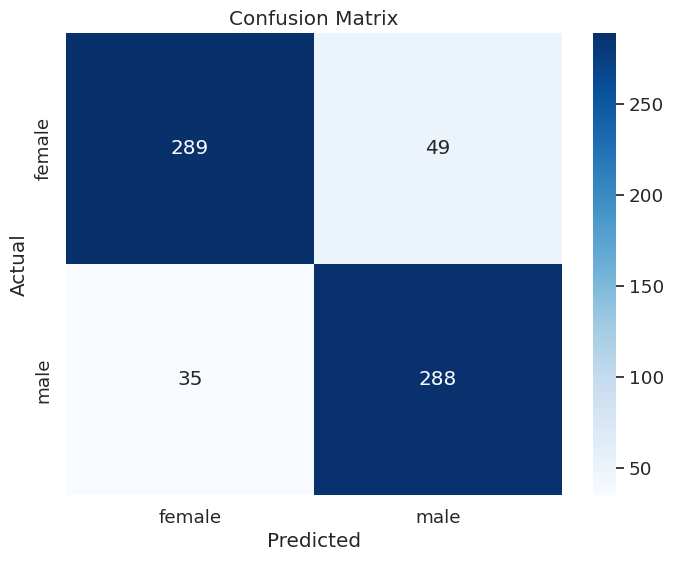

In [425]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix( y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=['female','male' ], yticklabels=['female','male'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [426]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt



# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       338
           1       0.85      0.89      0.87       323

    accuracy                           0.87       661
   macro avg       0.87      0.87      0.87       661
weighted avg       0.87      0.87      0.87       661



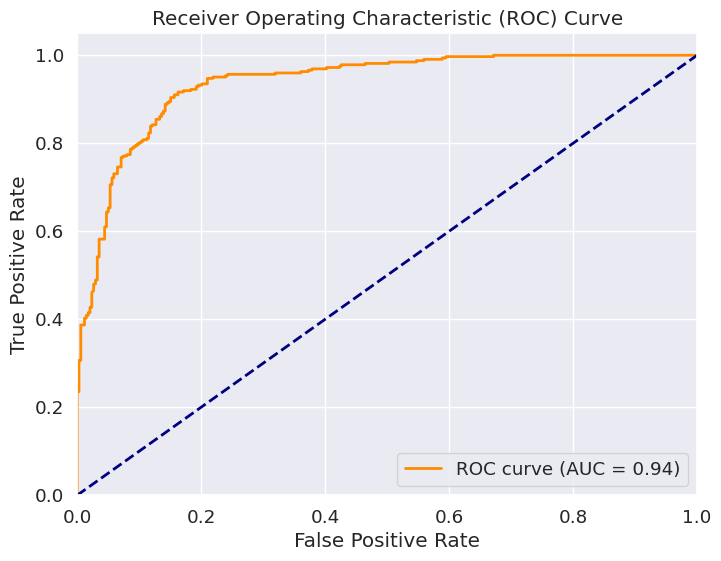

In [427]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_probs = model.predict_proba(X_test)[:, 1]  # Use [:, 1] to get the probability of the positive class

# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [428]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions in 'y_pred' and true labels in 'y_test'
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8545994065281899
Recall: 0.891640866873065
F1 score: 0.8727272727272727
